In [33]:
#  Synthetic control package requires scipy 1.4.1 
import scipy
print(scipy.__version__)

!pip install scipy==1.4.1
# You may need to restart the kernel to use updated packages.

1.4.1


In [58]:
import scipy
print(scipy.__version__)

1.4.1


In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
# Install synthetic control package 
!pip install SyntheticControlMethods

In [61]:
# Imports packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
from matplotlib import pyplot as plt
import os
from SyntheticControlMethods import Synth, DiffSynth

%matplotlib inline

In [62]:
# Import dataframes for both the 5 and 10 feature datasets 
path = os.getcwd()

data_5 = pd.read_csv(path+'/1_CSV_Data/Cell_Phone_DF5.csv')
data_10 = pd.read_csv(path+'/1_CSV_Data/Cell_Phone_DF10.csv')

In [63]:
# Split out year and turn into int as column is currently a string e.g. 2015-2016
data_5['first_year'] = data_5.schoolyear.apply(lambda x: x[:4])
data_5["first_year"] = data_5["first_year"].astype(str).astype(int)

data_10['first_year'] = data_10.schoolyear.apply(lambda x: x[:4])
data_10["first_year"] = data_10["first_year"].astype(str).astype(int)


# Sename columns to make them easier to understand 
data_5.rename(columns = {'first_year':'year', 'Estimate Total Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months':'gov_aid', 'fundbalanceas%ofexpenditure':'balance_of_expenditure', 'Estimate Median household income in the past 12 months (in 2018 inflation-adjusted dollars)':'median_income'}, inplace = True)
data_10.rename(columns = {'first_year':'year', 'Estimate Total Living in household with Supplemental Security Income (SSI), cash public assistance income, or Food Stamps/SNAP in the past 12 months':'gov_aid', 'fundbalanceas%ofexpenditure':'balance_of_expenditure', 'Estimate Median household income in the past 12 months (in 2018 inflation-adjusted dollars)':'median_income',"Estimate Total Bachelor's degree": "Bachelor degree", "Estimate Total Master's degree" : "Master degree" }, inplace = True)

In [64]:
# Drop columns that will not be used in the model 
data_5.drop(['Unnamed: 0', 'schoolyear','districtcode'] ,axis=1, inplace=True)
data_10.drop(['Unnamed: 0', 'schoolyear','districtcode','english_language_learners_enrollment.1'] ,axis=1, inplace=True)

In [65]:
# Check years 
data_5['year'].unique()

array([2015, 2016, 2017, 2018, 2020])

In [ ]:
# Build synthetic control models based off of the two DFs. Variables in model inlcude Dependent 8th_math_percentmet, Identifiers to split between control and treatment 1) districtname and 2) year  
sc_5 = Synth(data_5, "8th_math_percentmet", "districtname", "year", 2019, 'Forest Hills Public Schools', n_optim=10, pen="auto", random_seed=0)

sc_10 = Synth(data_10, "8th_math_percentmet", "districtname", "year", 2019, 'Forest Hills Public Schools', n_optim=10, pen="auto", random_seed=0)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  8.98230D+03    |proj g|=  2.00000D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     10      8     0     2   3.126D-05   2.174D+02
  F =   217.43555555608344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     42      9     0     4   2.245D-04   2.174D+02
  F =   217.43555555608083     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds



 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    0    f=  1.48780D+04    |proj g|=  9.78951D+00

At iterate    3    f=  1.81935D+03    |proj g|=  9.99914D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3      7     15     0     7   9.999D-01   1.819D+03
  F =   1819.3509200414132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17193D+04    |proj g|=  6.40693D+00

           * * *

Tit   = total number of iterations
Tnf   = total nu


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate   12    f=  3.69109D+01    |proj g|=  1.76678D+01
  ys=-2.300E-05  -gs= 1.338E-02 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   15    f=  3.68969D+01    |proj g|=  1.76677D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     15     89     44     3     3   1.767D+01   3.690D+01
  F =   36.896866521229455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.23561D+02    |proj g|=  5.55478D+00
  ys=-4.919E-02  -gs= 1.053E+02 BFGS update SKIPPED

At iterate    3    f=  8.17474D+02    |proj g|=  5.34118D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      4     79     32     1     9   5.341D+00   8.175D+02
  F =   817.47407372615191     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds



 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    0    f=  3.96042D+03    |proj g|=  1.67258D+01

At iterate    3    f=  2.61478D+03    |proj g|=  1.81899D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      3      5     13     0     6   1.819D-04   2.615D+03
  F =   2614.7805555555551     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24936D+03    |proj g|=  1.31114D+01

At iterate    3    f=  2.33129D+02    |proj g|=  1.59433D+01

At iter

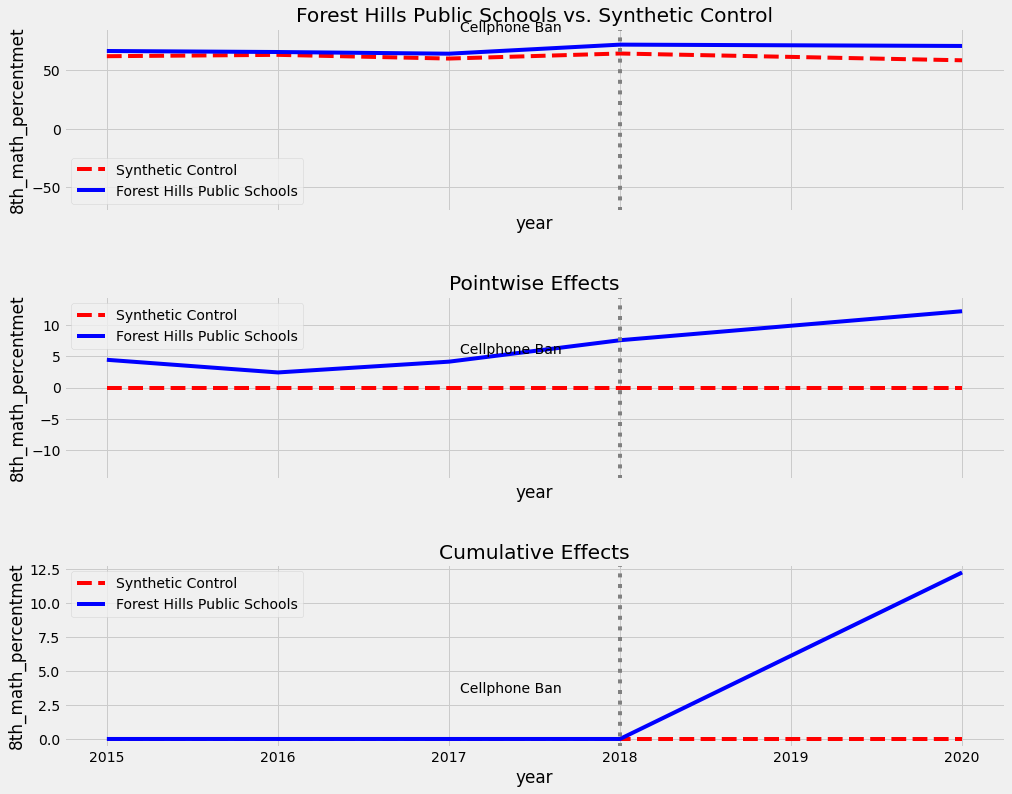

In [56]:
# Set style of graphs 
plt.style.use('fivethirtyeight')

# Plot synthetic control for 5 feature model 
sc_5.plot(["original", "pointwise", "cumulative"], treated_label="Forest Hills Public Schools", 
            synth_label="Synthetic Control", treatment_label="Cellphone Ban")




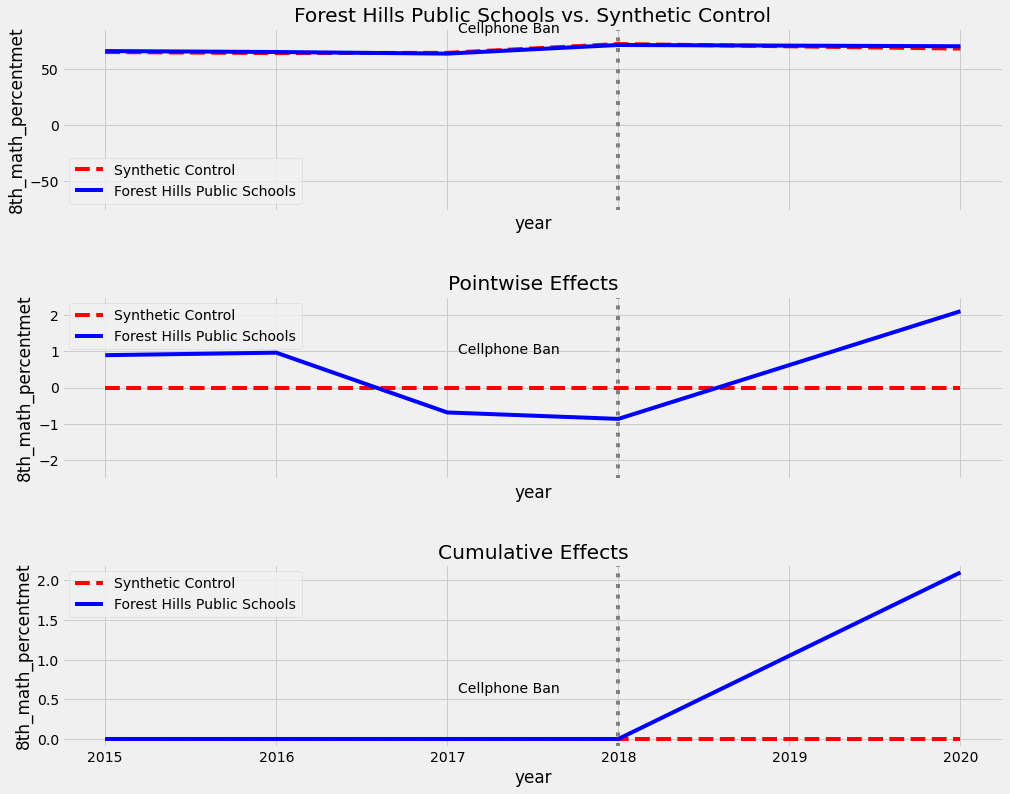

In [57]:
# Plot synthetic control for 10 feature model 

sc_10.plot(["original", "pointwise", "cumulative"], treated_label="Forest Hills Public Schools", 
            synth_label="Synthetic Control", treatment_label="Cellphone Ban")

In [23]:
# Districts identified for 5-feature model synthetic control 
sc_5.original_data.weight_df

,Weight
Saline Area Schools,1.0


In [25]:
# Districts identified for 10-feature model synthetic control 
sc_10.original_data.weight_df

,Weight
Troy School District,0.939018
West Ottawa Public School District,0.060982


In [ ]:
# Metrics for 5-feature model synthetic control 
sc_5.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Forest Hills Public Schools,5.007007,12.226667,2.441911


In [26]:
# Metrics for 10-feature model synthetic control 
sc_10.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Forest Hills Public Schools,0.856226,2.101335,2.454184


In [27]:
# Breakdown of 5-feature model similarities between control and treatment group 
sc_5.original_data.comparison_df

,Forest Hills Public Schools,Synthetic Forest Hills Public Schools,WMAPE,Importance
8th_math_percentmet,66.93,63.37,3.56,0.29
attendance,96.07,95.90,0.17,0.08
teacher_min_effective_percentage,0.61,0.79,0.18,0.00
median_income,104785.00,110321.00,5536.00,0.29
balance_of_expenditure,14.24,5.20,9.04,0.03
gov_aid,398.00,684.00,286.00,0.30


In [28]:
# Breakdown of 10-feature model similarities between control and treatment group 
sc_10.original_data.comparison_df

,Forest Hills Public Schools,Synthetic Forest Hills Public Schools,WMAPE,Importance
8th_math_percentmet,66.93,66.86,3.71,0.01
english_language_learners_enrollment,424.50,2072.95,1648.45,0.36
attendance,96.07,96.54,0.64,0.00
admin_min_effective_percentage,0.00,0.67,0.67,0.06
teacher_min_effective_percentage,0.61,0.19,0.51,0.00
median_income,104785.00,99482.23,5302.77,0.01
Bachelor degree,12545.00,13996.23,2192.16,0.20
Master degree,6055.00,9812.76,4139.38,0.36
balance_of_expenditure,14.24,16.74,2.49,0.00
gov_aid,398.00,893.24,495.24,0.00


In [ ]:
# In-time placebo set at 2017 (1 year prior to actual treatment). 
# Placebo helps verify actual synthetic control is not a fluke 
sc_5.in_time_placebo(2017, n_optim=50)

# Visualize
sc_5.plot(['in-time placebo'], 
            treated_label="Forest Hills Public Schools",
            synth_label="Synthetic Control")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=     Infinity    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0         NaN    Infinity
  F =                  Infinity

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds



 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    0    f=  9.70664D-02    |proj g|=  9.90829D-01
  ys=-4.613E-07  -gs= 8.312E-05 BFGS update SKIPPED

At iterate    3    f=  9.68709D-02    |proj g|=  9.90782D-01
  ys=-5.327E-09  -gs= 1.375E-06 BFGS update SKIPPED
  ys=-2.869E-04  -gs= 1.548E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     44      8     3     1   9.908D-01   9.687D-02
  F =   9.6870754258831571E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables ar


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     54     14     0     5   3.487D-01   4.323D-02
  F =   4.3231838751761426E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=     Infinity    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    0    f=  1.19621D+00    |proj g|=  9.86830D-01
  ys=-4.353E+04  -gs= 3.976E+01 BFGS update SKIPPED

At iterate    3    f=  5.39079D-02    |proj g|=  1.00000D+00

At iterate    6    f=  4.00805D-03    |proj g|=  9.99703D-01
  ys=-1.183E+00  -gs= 1.127E-01 BFGS update SKIPPED

At iterate    9    f=  3.69630D-03    |proj g|=  9.99387D-01
  ys=-3.307E-08  -gs= 1.501E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     63     17     3     0   9.997D-01   5.251D-02
  F =   5.2506270703424326E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-


 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    0    f=  1.01948D+00    |proj g|=  9.81872D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2      6      6     0     0   1.148D-01   8.828D-02
  F =   8.8283151356220127E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90970D-02    |proj g|=  3.69123D-01

At iterate    3    f=  4.32416D-02    |proj g|=  9.80136D-01
  ys=-8.429E-01  -gs= 1.664E-04 BFGS update SKIPPED

           * * *


/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1338: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:255: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


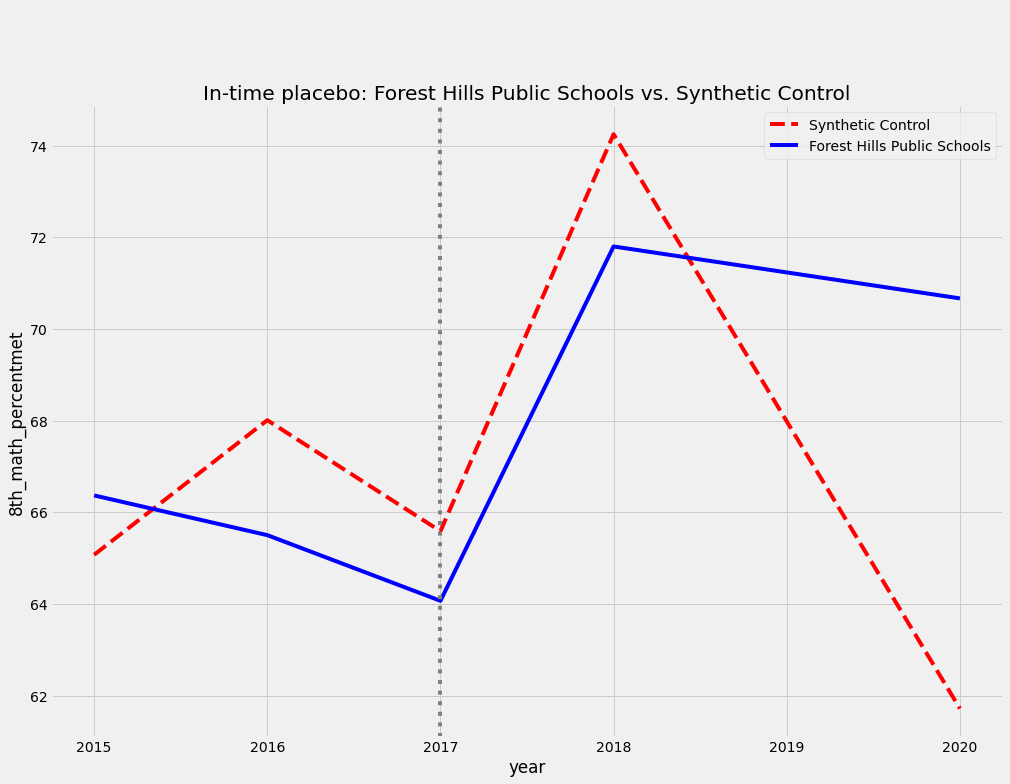

In [ ]:
# In-time placebo set at 2017 (1 year prior to actual treatment). 
# Placebo helps verify actual synthetic control is not a fluke 

sc_10.in_time_placebo(2017, n_optim=50)

#Visualize
sc_10.plot(['in-time placebo'], 
            treated_label="Forest Hills Public Schools",
            synth_label="Synthetic Control")

In [ ]:
# Visualize treatment and control shools average math schools over the years 
ax = plt.subplot(1, 1, 1)
data_5['Forest_Hill'] = data_5['districtname'] =='Forest Hills Public Schools'
(data_5.assign(forest = np.where(data_5["Forest_Hill"], "Forest Hill Public", "Other District"))
 .groupby(["year", "Forest_Hill"])
 ["8th_math_percentmet"]
 .mean()
 .reset_index()
 .pivot("year", "Forest_Hill", "8th_math_percentmet")
 .plot(ax=ax, label='Roll', figsize=(10,5)))

plt.vlines(x=2018, ymin=40, ymax=100, linestyle=":", lw=2, label="Cell Phone Ban")
plt.xlabel("year")
plt.ylabel("Math Scores")
plt.title("Mean Math Scores for Treatment and Control")
plt.legend();  